In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
try:
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
    print("Dataset fetched successfully.")
except Exception as e:
    print(f"Error fetching dataset. Make sure you are connected to the internet.")
    print(f"Error: {e}")

Dataset fetched successfully.


In [3]:
X = mnist.data
y = mnist.target

# Scale the pixel data
# The pixel values range from 0 (black) to 255 (white).
# Scaling them to a 0-1 range helps the model train faster and more reliably.
X_scaled = X / 255.0

In [4]:
# MNIST is pre-split: the first 60,000 are for training, the last 10,000 are for testing.
X_train, X_test = X_scaled[:60000], X_scaled[60000:]
y_train, y_test = y[:60000], y[60000:]

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 784)
Test data shape: (10000, 784)


In [5]:
print("\n--- 4. Training a Logistic Regression model ---")
model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100, random_state=42, n_jobs=-1)

model.fit(X_train, y_train)
print("Model training complete.")


--- 4. Training a Logistic Regression model ---


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model training complete.


/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [6]:
print("\n--- 5. Evaluating the model on the test set ---")
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Show a detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- 5. Evaluating the model on the test set ---
Model Accuracy: 92.63%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000




Confusion Matrix:


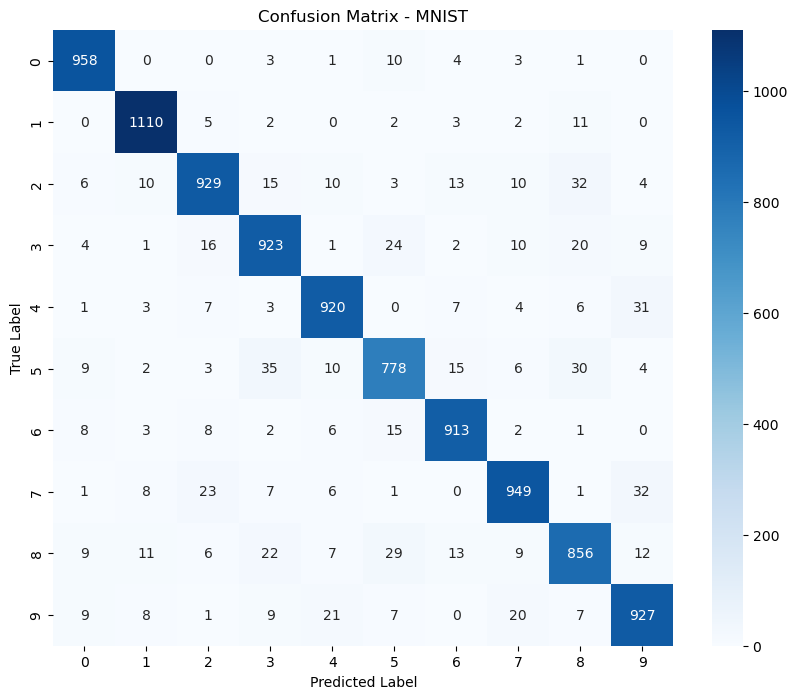

In [7]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MNIST')
plt.show()


--- 6. Showing some example predictions ---


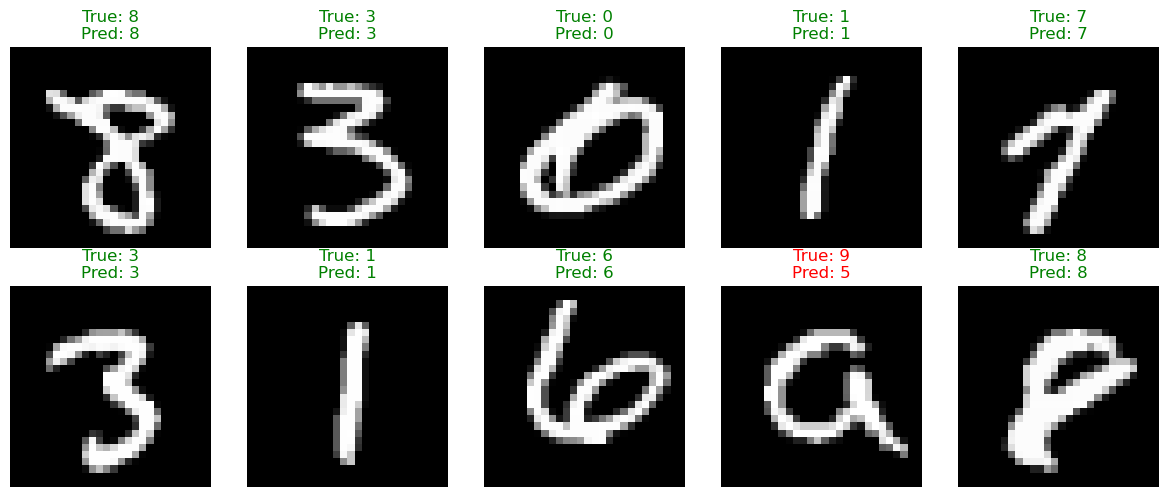

In [8]:
print("\n--- 6. Showing some example predictions ---")
plt.figure(figsize=(12, 5))
for i in range(10): 
    plt.subplot(2, 5, i + 1)
    

    idx = np.random.randint(0, len(X_test))
    

    image = X_test[idx].reshape(28, 28) 
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=('green' if true_label == pred_label else 'red'))
    plt.axis('off')

plt.tight_layout()
plt.show()